# Setup

In [1]:
%cd ..

import importlib
import os

import joblib
import pandas as pd

import tlp

url = 'http://konect.cc/files/download.tsv.sx-askubuntu.tar.bz2'
dataset_id = '22'
adjusted_intervals = dict()

/scratch/bruingjde/temporalLinkprediction


# Download and extract data

In [2]:
os.makedirs(f'data/{dataset_id}', exist_ok=True)
filepath = f'data/{dataset_id}/edgelist.pkl'
if not os.path.isfile(filepath):
  edgelist = tlp.get_edgelist(url, dataset_id)
  joblib.dump(edgelist, filepath)

# Splitting

In [8]:
%%time
filepath_edgelist = f'data/{dataset_id}/edgelist.pkl'
filepath_mature = f'data/{dataset_id}/edgelist_mature.pkl'
filepath_probe = f'data/{dataset_id}/edgelist_probe.pkl'

if not os.path.isfile(filepath_mature) or not os.path.isfile(filepath_probe):
  edgelist_mature, edgelist_probe = tlp.split_in_intervals(
    edgelist=joblib.load(filepath_edgelist), **adjusted_intervals)
  joblib.dump(edgelist_mature, filepath_mature)
  joblib.dump(edgelist_probe, filepath_probe)

CPU times: user 133 ms, sys: 63.4 ms, total: 196 ms
Wall time: 202 ms


# Instances

In [3]:
%%time
filepath_mature = f'data/{dataset_id}/edgelist_mature.pkl'
filepath_instances = f'data/{dataset_id}/instances.pkl'

if not os.path.isfile(filepath_instances):
  instances = tlp.get_instances(edgelist_mature=joblib.load(filepath_mature),
    verbose=True)
  joblib.dump(instances, filepath_instances)

CPU times: user 1h 32s, sys: 52.2 s, total: 1h 1min 24s
Wall time: 1h 1min 25s


# Targets

In [4]:
%%time
filepath_instances = f'data/{dataset_id}/instances.pkl'
filepath_probe = f'data/{dataset_id}/edgelist_probe.pkl'
filepath_targets = f'data/{dataset_id}/targets.pkl'

if not os.path.isfile(filepath_targets):
  targets = tlp.get_targets(
    instances=joblib.load(filepath_instances),
    edgelist_probe=joblib.load(filepath_probe),
    verbose=True)
  joblib.dump(targets, filepath_targets)

Determine targets:   0%|          | 0/81694007 [00:00<?, ?it/s]

CPU times: user 4min 26s, sys: 3.52 s, total: 4min 30s
Wall time: 4min 29s


# Sampling

In [5]:
%%time
filepath_instances = f'data/{dataset_id}/instances.pkl'
filepath_targets = f'data/{dataset_id}/edgelist_targets.pkl'
filepath_instances_sampled = f'data/{dataset_id}/instances_sampled.pkl'
filepath_targets_sampled = f'data/{dataset_id}/targets_sampled.pkl'

if not (os.path.isfile(filepath_instances_sampled) and 
        os.path.isfile(filepath_targets_sampled)):
  instances_sampled, targets_sampled = tlp.balanced_sample(instances, targets)
  joblib.dump(instances_sampled, filepath_instances_sampled)
  joblib.dump(targets_sampled, filepath_targets_sampled)

CPU times: user 4.25 s, sys: 256 ms, total: 4.51 s
Wall time: 4.52 s


# Analysis

## Figure: Edge distribution with maturing and probing intervals indicated

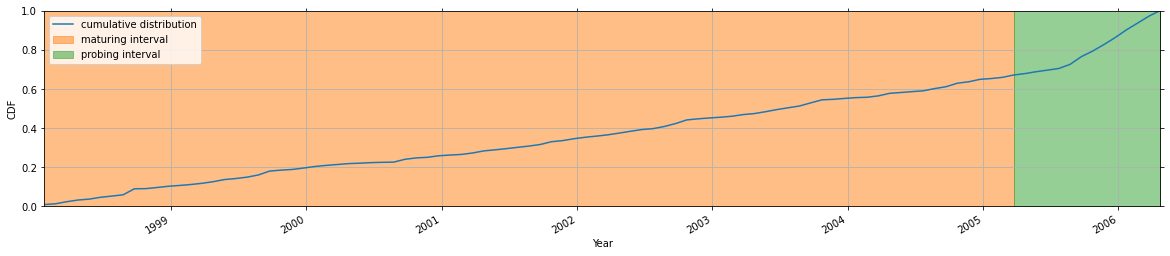

In [9]:
tlp.analysis.plot_datetime(
  joblib.load(f'{dataset_id}/edgelist.pkl')['datetime'], **adjusted_intervals)

## Metric: Class imbalance

In [10]:
tlp.analysis.class_imbalance(targets=joblib.load(f'{dataset_id}/targets.pkl'))

,absolute,relative
False,164323,0.996997
True,495,0.003003


## Figure: Datetime strategies

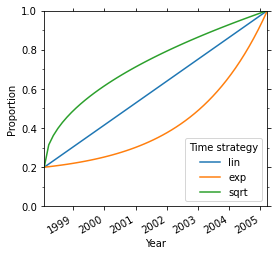

In [11]:
edgelist = joblib.load(f'{dataset_id}/edgelist_mature.pkl')
t = tlp.analysis.plot_datetime_strategies(edgelist['datetime'])

## Figure: Datetime distribution

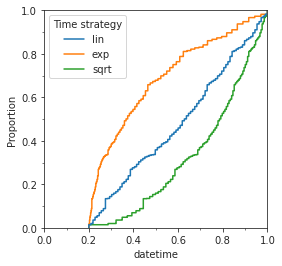

In [12]:
edgelist = joblib.load(f'{dataset_id}/edgelist_mature.pkl')
tlp.analysis.plot_datetime_distribution(edgelist['datetime'])

## Figure: Scores

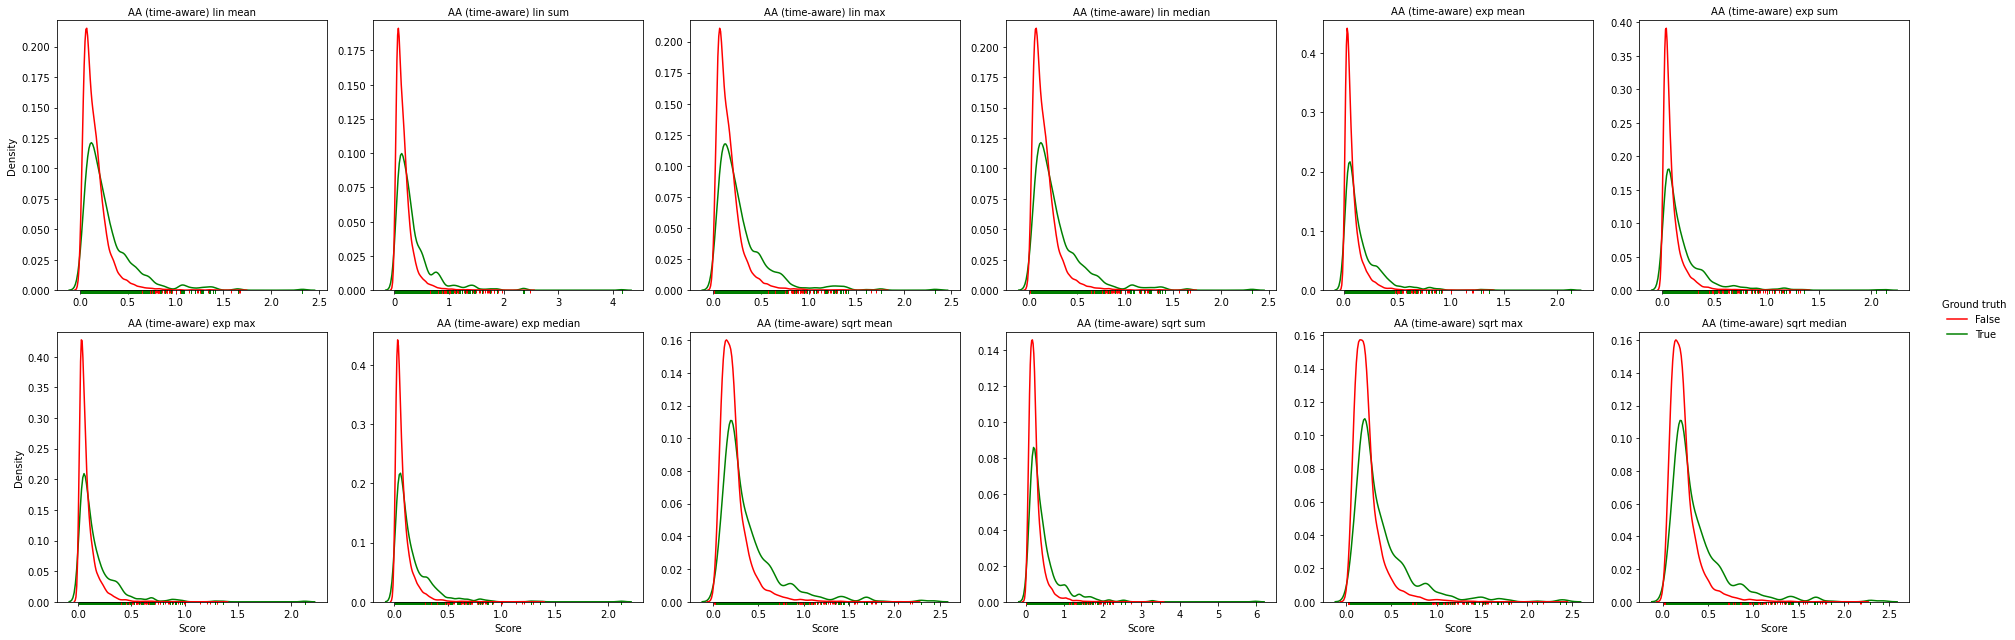

In [13]:
feature_dict = dict()
for file in os.scandir(f'{dataset_id}/features'):
  if file.is_file():
    feature_dict.update(joblib.load(file.path))
targets=joblib.load('01/targets_sampled.pkl')

tlp.analysis.plot_score(feature_dict, targets)

## Figure: ROC

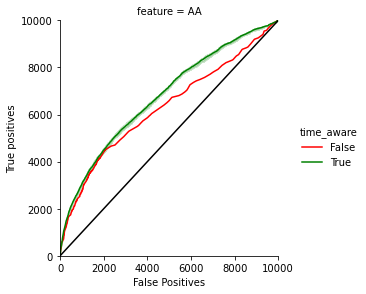

In [14]:
feature_dict = dict()
for file in os.scandir(f'{dataset_id}/features'):
  if file.is_file():
    feature_dict.update(joblib.load(file.path))
targets=joblib.load('01/targets_sampled.pkl')

tlp.analysis.plot_roc_auc(feature_dict, targets)

## AUC

In [ ]:
feature_dict = dict()
for file in os.scandir(f'data/{dataset_id}/features'):
  for file in os.scandir(f'data/{dataset_id}/features'):
    if file.is_file():
      feature_dict.update(joblib.load(file.path))
targets=joblib.load(f'data/{dataset_id}/targets_sampled.pkl')

tlp.analysis.get_auc(feature_dict, targets)